In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [118]:
world_ranking=pd.read_csv('/content/fifa_ranking_2022-10-06 - fifa_ranking_2022-10-06.csv.csv')
world_cup=pd.read_csv('/content/world_cup - world_cup.csv.csv')
matches=pd.read_csv('/content/matches_1930_2022 - matches_1930_2022.csv.csv')

In [119]:
world_ranking.head() #2018, #2022

,team,team_code,association,rank,previous_rank,points,previous_points
0,Brazil,BRA,CONMEBOL,1,1,1841.30,1837.56
1,Belgium,BEL,UEFA,2,2,1816.71,1821.92
2,Argentina,ARG,CONMEBOL,3,3,1773.88,1770.65
3,France,FRA,UEFA,4,4,1759.78,1764.85
4,England,ENG,UEFA,5,5,1728.47,1737.46


In [120]:
world_cup.head()

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches
0,2022,Qatar,32,Argentina,France,Kylian Mbappé - 8,3404252,53191,64
1,2018,Russia,32,France,Croatia,Harry Kane - 6,3031768,47371,64
2,2014,Brazil,32,Germany,Argentina,James Rodríguez - 6,3429873,53592,64
3,2010,South Africa,32,Spain,Netherlands,"Wesley Sneijder, Thomas Müller... - 5",3178856,49670,64
4,2006,Germany,32,Italy,France,Miroslav Klose - 5,3352605,52384,64


In [121]:
matches.head()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...
2,France,Morocco,2,2.0,NaN,0,0.9,NaN,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',..."
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,NaN,NaN,NaN,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...


In [122]:
print(matches.shape)
print(world_ranking.shape)
print(world_cup.shape)

(964, 44)
(211, 7)
(22, 9)


In [123]:
#checking for null values
matches.isnull().sum()/len(matches)*100

,0
home_team,0.000000
away_team,0.000000
home_score,0.000000
home_xg,86.721992
home_penalty,96.369295
away_score,0.000000
away_xg,86.721992
away_penalty,96.369295
home_manager,0.000000
home_captain,33.195021


In [124]:
world_ranking.isnull().sum()/len(world_ranking)*100

,0
team,0.0
team_code,0.0
association,0.0
rank,0.0
previous_rank,0.0
points,0.0
previous_points,0.0


In [125]:
world_cup.isnull().sum()/len(world_cup)*100

,0
Year,0.0
Host,0.0
Teams,0.0
Champion,0.0
Runner-Up,0.0
TopScorrer,0.0
Attendance,0.0
AttendanceAvg,0.0
Matches,0.0


In [126]:
print(matches.duplicated().sum())
print(world_cup.duplicated().sum())
print(world_ranking.duplicated().sum())

0
0
0


In [127]:
matches['home_team'].unique()

array(['Argentina', 'Croatia', 'France', 'Morocco', 'England',
       'Netherlands', 'Portugal', 'Japan', 'Brazil', 'Korea Republic',
       'Ghana', 'Cameroon', 'Serbia', 'Canada', 'Costa Rica', 'Australia',
       'Tunisia', 'Saudi Arabia', 'Poland', 'Ecuador', 'IR Iran', 'Wales',
       'Belgium', 'Spain', 'Qatar', 'Switzerland', 'Uruguay', 'Germany',
       'Denmark', 'Mexico', 'Senegal', 'United States', 'Sweden',
       'Russia', 'Colombia', 'Panama', 'Iceland', 'Nigeria', 'Peru',
       'Egypt', 'Algeria', 'Bosnia and Herzegovina', 'Honduras', 'Italy',
       'Greece', "Côte d'Ivoire", 'Chile', 'Paraguay', 'Korea DPR',
       'Slovakia', 'Slovenia', 'South Africa', 'New Zealand', 'Ukraine',
       'Togo', 'Czech Republic', 'Serbia and Montenegro', 'Angola',
       'Trinidad and Tobago', 'Türkiye', 'China PR',
       'Republic of Ireland', 'Romania', 'Scotland', 'FR Yugoslavia',
       'Jamaica', 'Bulgaria', 'Bolivia', 'Norway', 'West Germany',
       'Yugoslavia', 'Czechoslovaki

In [128]:
matches['home_team']=matches['home_team'].apply(lambda x:x.replace('Germany DR', 'West Germany'))
matches['away_team']=matches['away_team'].apply(lambda x:x.replace('Germany DR', 'West Germany'))

#EDA

In [129]:
# total number of matches played till 2022
print(f'Total number of matches : {len(matches)}')
# total goals scored (excluding penalty goals)
print(f"Total Goals scored :{sum(matches['home_score']+matches['away_score'])}")
# average goals scored per match
print(f"Average Goals scored per match :{sum(matches['home_score']+matches['away_score'])/len(matches)}")
# total attendance over time
print(f"Total Attendance over time :{sum(matches['Attendance'])}")
# average attandance over time
print(f"Average Attendance over time :{sum(matches['Attendance'])/len(matches)}")

Total number of matches : 964
Total Goals scored :2720
Average Goals scored per match :2.8215767634854774
Total Attendance over time :44048413
Average Attendance over time :45693.3744813278


In [130]:
#Times a particular country is winner, first runner up or second runner up

In [131]:
winner=world_cup['Champion'].value_counts().reset_index()
winner

,Champion,count
0,Brazil,5
1,Italy,4
2,Argentina,3
3,France,2
4,Germany,2
5,West Germany,2
6,Uruguay,2
7,Spain,1
8,England,1


In [132]:
fig= px.pie(winner, values='count', names='Champion', title='Number of times a Country Won FIFA World Cup')
fig.update_traces(textinfo='label+value')
fig.show()

In [133]:
#first runner up and second runner up

In [134]:
matches['Round'].unique()

array(['Final', 'Third-place match', 'Semi-finals', 'Quarter-finals',
       'Round of 16', 'Group stage', 'Second group stage',
       'First group stage', 'Second round', 'First round',
       'Group stage play-off', 'Final stage'], dtype=object)

In [135]:
matches['home_penalty'].fillna(0, inplace=True)
matches['away_penalty'].fillna(0, inplace=True)

<ipython-input-135-c188776c818e>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-135-c188776c818e>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

In [136]:
matches

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...
1,Croatia,Morocco,2,0.7,0.0,1,1.2,0.0,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...
2,France,Morocco,2,2.0,0.0,0,0.9,0.0,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...
3,Argentina,Croatia,3,2.3,0.0,0,0.5,0.0,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',..."
4,Morocco,Portugal,1,1.4,0.0,0,0.9,0.0,Hoalid Regragui,Romain Saïss,...,NaN,NaN,NaN,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Argentina,France,1,NaN,0.0,0,NaN,0.0,Francisco Olazar,Manuel Ferreira,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960,Yugoslavia,Brazil,2,NaN,0.0,1,NaN,0.0,Bosko Simonovic,Milutin Ivković,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
961,Romania,Peru,3,NaN,0.0,1,NaN,0.0,Octav Luchide,Emerich Vogl,...,NaN,NaN,NaN,Plácido Galindo · 70,NaN,NaN,NaN,NaN,NaN,NaN
962,United States,Belgium,3,NaN,0.0,0,NaN,0.0,Bob Millar,Tom Florie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
matches['h_total']=matches['home_score']+matches['home_penalty']
matches['a_total']=matches['away_score']+matches['away_penalty']

In [138]:
Runner=matches[matches['Round']=='Final']
Third=matches[matches['Round']=='Third-place match']

In [139]:
#runner up
def get_runner_up(row):
  if(row['h_total']>row['a_total']):
    return row['away_team']
  else:
    return row['home_team']

#third place
def get_third_up(row):
  if(row['h_total']>row['a_total']):
    return row['home_team']
  else:
    return row['away_team']

In [140]:
Runner['Runner_up']=Runner.apply(get_runner_up, axis=1)
Third['Third_place']=Third.apply(get_third_up, axis=1)

<ipython-input-140-7021216d107a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-140-7021216d107a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [141]:
Runner['Runner_up'].value_counts()

,count
Runner_up,
Argentina,3
Netherlands,3
West Germany,3
France,2
Italy,2
Czechoslovakia,2
Hungary,2
Croatia,1
Germany,1


In [142]:
trace1= go.Bar(x=Runner['Runner_up'].value_counts().index, y=Runner['Runner_up'].value_counts(), name='First Runner Up')
trace2= go.Bar(x=Third['Third_place'].value_counts().index, y=Third['Third_place'].value_counts(), name='Second Runner Up')

In [143]:
fig= make_subplots(rows=1, cols=2, subplot_titles=('First Runner Up', 'Second Runner Up'))
fig.add_trace(trace1,1,1)
fig.add_trace(trace2,1,2)
fig.show()

### Conclusions
* Brazil won the most number of titles followed by Italy and Argentina.
* Argentina,Netherland and West Germany won the most number of runner up title.
* Germany was second runner up for most number of times.


In [144]:
# In which year a particular team participated

In [145]:
data=matches.groupby('Year').agg(home=('home_team', list), away=('away_team', list))
data

,home,away
Year,,
1930,"[Uruguay, Uruguay, Argentina, Argentina, Urugu...","[Argentina, Yugoslavia, United States, Chile, ..."
1934,"[Italy, Germany, Czechoslovakia, Italy, Italy,...","[Czechoslovakia, Austria, Germany, Austria, Sp..."
1938,"[Brazil, Italy, Hungary, Italy, Brazil, Sweden...","[Sweden, Hungary, Sweden, Brazil, Czechoslovak..."
1950,"[Sweden, Uruguay, Brazil, Uruguay, Brazil, Uru...","[Spain, Brazil, Spain, Sweden, Sweden, Spain, ..."
1954,"[Germany, Austria, Hungary, Germany, Germany, ...","[Hungary, Uruguay, Uruguay, Austria, Yugoslavi..."
1958,"[Brazil, France, Sweden, Brazil, France, West ...","[Sweden, West Germany, West Germany, France, N..."
1962,"[Brazil, Chile, Brazil, Czechoslovakia, Chile,...","[Czechoslovakia, Yugoslavia, Chile, Yugoslavia..."
1966,"[England, Portugal, England, West Germany, Por...","[West Germany, Soviet Union, Portugal, Soviet ..."
1970,"[Brazil, West Germany, Italy, Brazil, Brazil, ...","[Italy, Uruguay, West Germany, Uruguay, Peru, ..."


In [146]:
data['teams']=data.apply(lambda x:list(set(x['home']+x['away'])), axis=1)

In [147]:
data['#']=data['teams'].apply(len)

In [148]:
data

,home,away,teams,#
Year,,,,
1930,"[Uruguay, Uruguay, Argentina, Argentina, Urugu...","[Argentina, Yugoslavia, United States, Chile, ...","[France, Belgium, Romania, Mexico, Argentina, ...",13
1934,"[Italy, Germany, Czechoslovakia, Italy, Italy,...","[Czechoslovakia, Austria, Germany, Austria, Sp...","[Sweden, Spain, Belgium, Romania, United State...",16
1938,"[Brazil, Italy, Hungary, Italy, Brazil, Sweden...","[Sweden, Hungary, Sweden, Brazil, Czechoslovak...","[Poland, Sweden, Cuba, Belgium, Romania, Norwa...",15
1950,"[Sweden, Uruguay, Brazil, Uruguay, Brazil, Uru...","[Spain, Brazil, Spain, Sweden, Sweden, Spain, ...","[Sweden, Spain, Mexico, Paraguay, Italy, Urugu...",13
1954,"[Germany, Austria, Hungary, Germany, Germany, ...","[Hungary, Uruguay, Uruguay, Austria, Yugoslavi...","[Belgium, Mexico, Korea Republic, Türkiye, Aus...",16
1958,"[Brazil, France, Sweden, Brazil, France, West ...","[Sweden, West Germany, West Germany, France, N...","[Sweden, Soviet Union, Mexico, Argentina, Para...",16
1962,"[Brazil, Chile, Brazil, Czechoslovakia, Chile,...","[Czechoslovakia, Yugoslavia, Chile, Yugoslavia...","[Soviet Union, Spain, Colombia, Mexico, Argent...",16
1966,"[England, Portugal, England, West Germany, Por...","[West Germany, Soviet Union, Portugal, Soviet ...","[Soviet Union, Spain, Mexico, Argentina, Italy...",16
1970,"[Brazil, West Germany, Italy, Brazil, Brazil, ...","[Italy, Uruguay, West Germany, Uruguay, Peru, ...","[Sweden, Soviet Union, Belgium, Romania, Moroc...",16


In [149]:
data_pivot=data['teams'].explode().reset_index().pivot(index='Year', columns='teams', values='Year').T

In [150]:
data_pivot.fillna(0, inplace=True)

In [151]:
data_pivot=data_pivot.applymap(lambda x:1 if  x>0 else 0)

<ipython-input-151-d7382e7c4f7a>:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



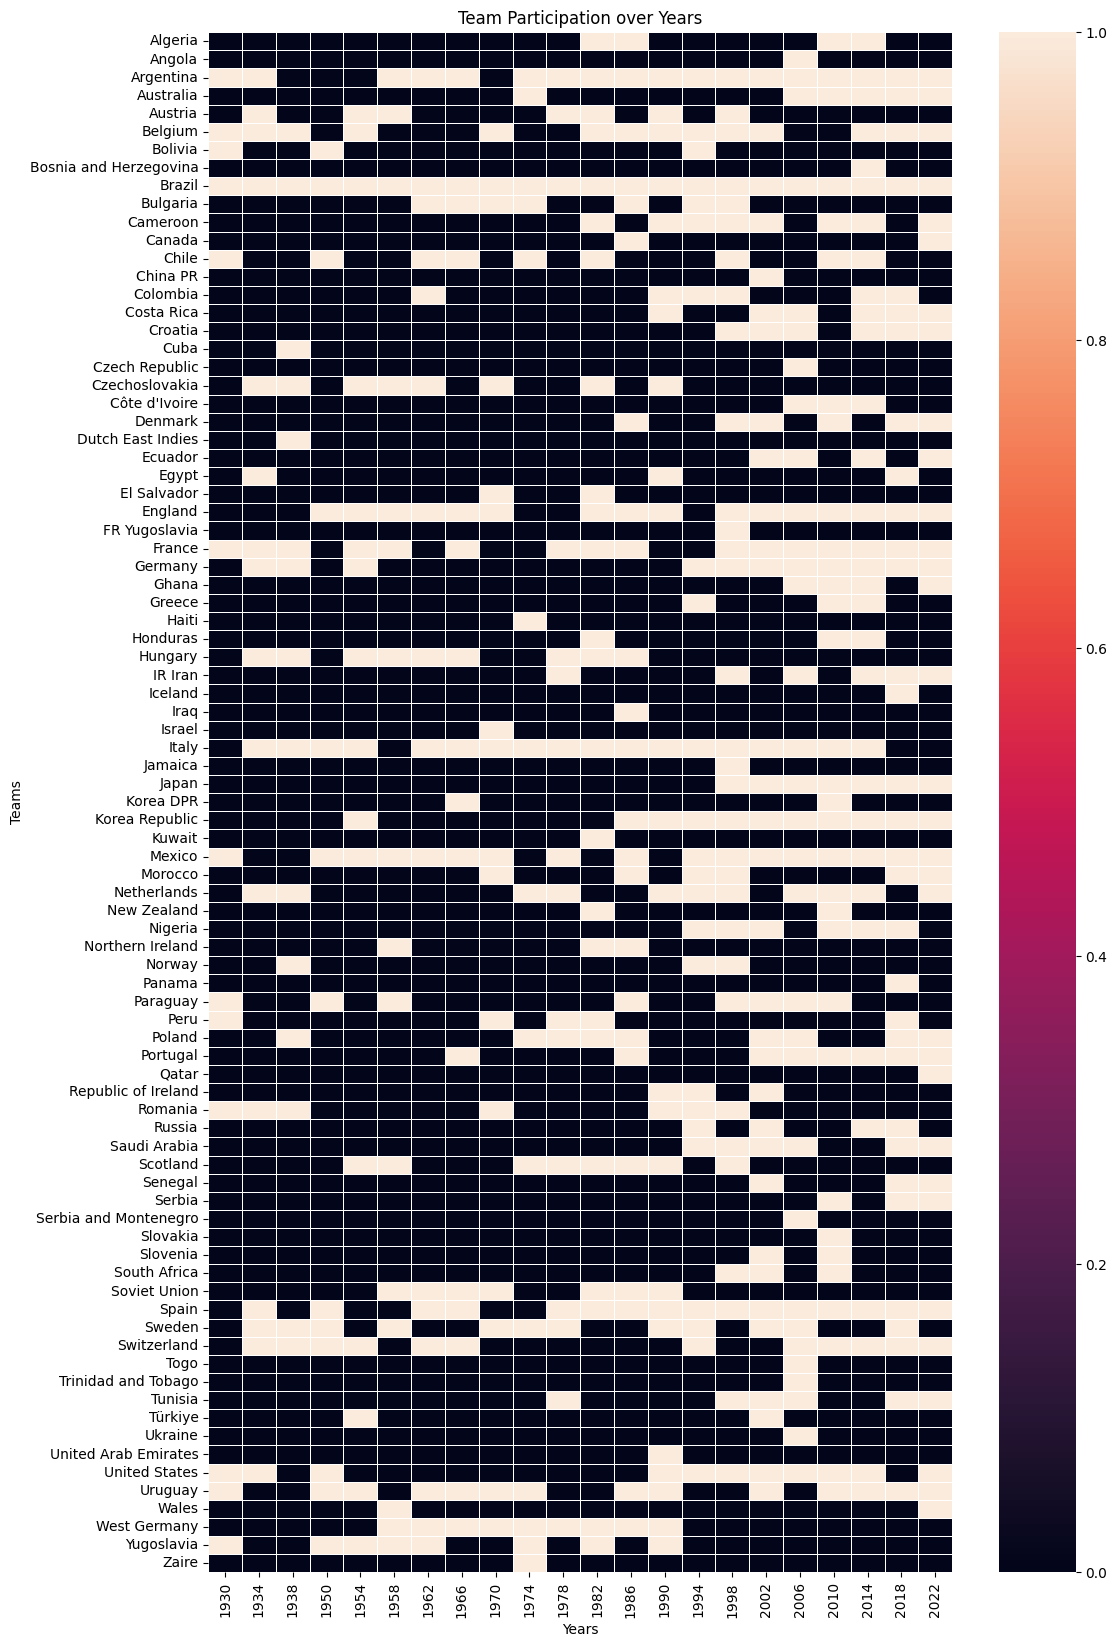

In [152]:
plt.figure(figsize=(12,20))
sns.heatmap(data_pivot, linewidths=0.5,linecolor='white')
plt.title('Team Participation over Years')
plt.xlabel('Years')
plt.ylabel('Teams')
plt.show()

### Observations
* Brazil is the only country to play all editions of the FIFA worldcup.
* Countries like Qatar, Canada and Wales are new in the tournament.
* Countries like Cuba, Israel, Kuwait, Jamaica, Ukraine, Tongo etc. participated in only 1 edition of FIFA.



In [153]:
#checking for which team team rank increased, decreased or remained same.
same_rank=world_ranking[world_ranking['rank']==world_ranking['previous_rank']]['team'].tolist()
rank_decreased=world_ranking[world_ranking['rank']>world_ranking['previous_rank']]['team'].tolist()
rank_increased=world_ranking[world_ranking['rank']<world_ranking['previous_rank']]['team'].tolist()

In [154]:
print(f'Same Rank: {len(same_rank)}')
print(f'Rank Decreased: {len(rank_decreased)}')
print(f'Rank Increased: {len(rank_increased)}')

Same Rank: 66
Rank Decreased: 68
Rank Increased: 77


In [155]:
max_length= max(len(same_rank), len(rank_decreased), len(rank_increased))

In [156]:
same_rank= same_rank+[None]*(max_length-len(same_rank))
rank_increased= rank_increased+[None]*(max_length-len(rank_increased))
rank_decreased= rank_decreased+[None]*(max_length-len(rank_decreased))

In [157]:
same_rank

['Brazil',
 'Belgium',
 'Argentina',
 'France',
 'England',
 'Netherlands',
 'Portugal',
 'Denmark',
 'Germany',
 'Colombia',
 'Senegal',
 'Wales',
 'Japan',
 'Poland',
 'Ukraine',
 'Korea Republic',
 'Chile',
 'Tunisia',
 'Ecuador',
 'Mali',
 'Albania',
 'Oman',
 'Israel',
 'Uzbekistan',
 'Honduras',
 'Guinea',
 'Bahrain',
 'Benin',
 'Palestine',
 'Kyrgyz Republic',
 'Equatorial Guinea',
 'Thailand',
 'Korea DPR',
 'Guatemala',
 'Turkmenistan',
 'Ethiopia',
 'St Kitts and Nevis',
 'Burundi',
 'Kuwait',
 'Liberia',
 'Chinese Taipei',
 'Myanmar',
 'Tahiti',
 'Fiji',
 'Vanuatu',
 'South Sudan',
 'Barbados',
 'Cuba',
 'Puerto Rico',
 'Mauritius',
 'Chad',
 'Macau',
 'American Samoa',
 'Cook Islands',
 'Brunei Darussalam',
 'Samoa',
 'Bangladesh',
 'Djibouti',
 'Tonga',
 'Guam',
 'Turks and Caicos Islands',
 'Sri Lanka',
 'US Virgin Islands',
 'British Virgin Islands',
 'Anguilla',
 'San Marino',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [158]:
df=pd.DataFrame({
    "Same Rank": same_rank,
    "Rank Increased": rank_increased,
    "Rank Decreased": rank_decreased
})

In [159]:
df

,Same Rank,Rank Increased,Rank Decreased
0,Brazil,Italy,Spain
1,Belgium,Croatia,Mexico
2,Argentina,Switzerland,Uruguay
3,France,IR Iran,USA
4,England,Serbia,Peru
...,...,...,...
72,None,Timor-Leste,None
73,None,Eritrea,None
74,None,Aruba,None
75,None,Bahamas,None


In [160]:
df.isnull().sum()

,0
Same Rank,11
Rank Increased,0
Rank Decreased,9


In [161]:
df.fillna('', inplace=True)

In [162]:
# function to check rank increase or decrease.
def find_rank(Country):
  result=[]
  for column in df.columns:
    matches=df[column]==Country
    if matches.any():
      result.append(column)
  return result

In [163]:
find_rank("Peru")

['Rank Decreased']

### Advance EDA

In [164]:
# probability of a team winning knockout matches

In [165]:
country='Argentina'

#knockout matches
#final, semi final, quarter final

In [166]:
data=matches[(matches['home_team']==country) | (matches['away_team']==country)&
        ((matches['Round']=='Final') | (matches['Round']=='Semi-finals') | (matches['Round']=='Quarter-finals'))]
data

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long,h_total,a_total
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...,7.0,5.0
3,Argentina,Croatia,3,2.3,0.0,0,0.5,0.0,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',...",3.0,0.0
7,Netherlands,Argentina,2,0.6,3.0,2,1.9,4.0,Louis van Gaal,Virgil van Dijk,...,NaN,NaN,Denzel Dumfries · 120+3,NaN,"['43&rsquor;|0:1|Jurriën Timber', '45+2&rsquor...","['31&rsquor;|0:0|Walter Samuel', '43&rsquor;|0...",['46&rsquor;|0:1|Steven Berghuis|for Steven Be...,['66&rsquor;|0:1|Leandro Paredes|for Rodrigo D...,5.0,6.0
15,Argentina,Australia,2,1.6,0.0,1,0.6,0.0,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,NaN,"['15&rsquor;|0:0|Jackson Irvine', '38&rsquor;|...",['50&rsquor;|1:0|Lisandro Martínez|for Papu Gó...,['58&rsquor;|2:0|Craig Goodwin|for Riley McGre...,2.0,1.0
43,Argentina,Mexico,2,0.3,0.0,0,0.3,0.0,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,['43&rsquor;|0:0|Gonzalo Montiel'],"['22&rsquor;|0:0|Néstor Araujo', '50&rsquor;|0...",['57&rsquor;|0:0|Enzo Fernández|for Guido Rodr...,['42&rsquor;|0:0|Erick Gutiérrez|for Andrés Gu...,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,Uruguay,Argentina,4,NaN,0.0,2,NaN,0.0,Alberto Suppici,José Nasazzi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0
948,Argentina,United States,6,NaN,0.0,1,NaN,0.0,Francisco Olazar,Manuel Ferreira,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.0
949,Argentina,Chile,3,NaN,0.0,1,NaN,0.0,Francisco Olazar,Manuel Ferreira,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0
954,Argentina,Mexico,6,NaN,0.0,3,NaN,0.0,Francisco Olazar,Ángel Bossio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,3.0


In [167]:
df1=data['Round'].value_counts().reset_index()
df1.columns=['Round', 'Total Matches']

In [168]:
# functions to determine the winner of each game

def get_winner(row):
  if(row['h_total']>row['a_total']):
    return row['home_team']
  else:
    return row['away_team']

In [169]:
data['Winner']=data.apply(get_winner, axis=1)

<ipython-input-169-5a866ed498eb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [170]:
df2=data[data['Winner']==country]['Round'].value_counts().reset_index()
df2.columns=['Round', 'Matches Won']

In [171]:
result=pd.merge(df1,df2, on='Round', how='inner')
result

,Round,Total Matches,Matches Won
0,Group stage,31,23
1,Quarter-finals,8,4
2,Final,6,3
3,Round of 16,6,6
4,Semi-finals,5,5
5,Second round,5,2
6,First round,4,3
7,First group stage,3,2


In [172]:
result['Percentage']=(result['Matches Won']/ result['Total Matches'])*100
result

,Round,Total Matches,Matches Won,Percentage
0,Group stage,31,23,74.193548
1,Quarter-finals,8,4,50.000000
2,Final,6,3,50.000000
3,Round of 16,6,6,100.000000
4,Semi-finals,5,5,100.000000
5,Second round,5,2,40.000000
6,First round,4,3,75.000000
7,First group stage,3,2,66.666667


In [173]:
# checking Playing strategy of teams in knockout vs non-knockout

In [174]:
matches['home_goal'][0]

'Ángel Di María · 36|Lionel Messi · 108'

In [175]:
# re -
import re

In [176]:
pattern  = r'\b(\d+)\b'

In [177]:
# function to extract time from each row for home team
def extract_time(row):
  if pd.notna(row['home_goal']):
    goal_str=str(row['home_goal'])
    times=[]
    matches=re.findall(pattern, goal_str)
    times.extend(matches)
    return ', '.join(times)
  else:
    return ''

In [178]:
matches['Home_Goals']=matches.apply(extract_time, axis=1)

In [179]:
matches

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long,h_total,a_total,Home_Goals
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...,7.0,5.0,"36, 108"
1,Croatia,Morocco,2,0.7,0.0,1,1.2,0.0,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...,2.0,1.0,"7, 42"
2,France,Morocco,2,2.0,0.0,0,0.9,0.0,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...,2.0,0.0,"5, 79"
3,Argentina,Croatia,3,2.3,0.0,0,0.5,0.0,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',...",3.0,0.0,"39, 69"
4,Morocco,Portugal,1,1.4,0.0,0,0.9,0.0,Hoalid Regragui,Romain Saïss,...,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...,1.0,0.0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Argentina,France,1,NaN,0.0,0,NaN,0.0,Francisco Olazar,Manuel Ferreira,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,81
960,Yugoslavia,Brazil,2,NaN,0.0,1,NaN,0.0,Bosko Simonovic,Milutin Ivković,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,"21, 30"
961,Romania,Peru,3,NaN,0.0,1,NaN,0.0,Octav Luchide,Emerich Vogl,...,Plácido Galindo · 70,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,"1, 79, 89"
962,United States,Belgium,3,NaN,0.0,0,NaN,0.0,Bob Millar,Tom Florie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,"23, 45, 69"


In [180]:
# function to extract time from each row for away team
def extract_time(row):
  if pd.notna(row['away_goal']):
    goal_str=str(row['away_goal'])
    times=[]
    matches=re.findall(pattern, goal_str)
    times.extend(matches)
    return ', '.join(times)
  else:
    return ''

In [181]:
matches['Away_Goals']=matches.apply(extract_time, axis=1)

In [182]:
matches

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long,h_total,a_total,Home_Goals,Away_Goals
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...,7.0,5.0,"36, 108",81
1,Croatia,Morocco,2,0.7,0.0,1,1.2,0.0,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...,2.0,1.0,"7, 42",9
2,France,Morocco,2,2.0,0.0,0,0.9,0.0,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...,2.0,0.0,"5, 79",
3,Argentina,Croatia,3,2.3,0.0,0,0.5,0.0,Lionel Scaloni,Lionel Messi,...,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',...",3.0,0.0,"39, 69",
4,Morocco,Portugal,1,1.4,0.0,0,0.9,0.0,Hoalid Regragui,Romain Saïss,...,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...,1.0,0.0,42,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Argentina,France,1,NaN,0.0,0,NaN,0.0,Francisco Olazar,Manuel Ferreira,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,81,
960,Yugoslavia,Brazil,2,NaN,0.0,1,NaN,0.0,Bosko Simonovic,Milutin Ivković,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,"21, 30",62
961,Romania,Peru,3,NaN,0.0,1,NaN,0.0,Octav Luchide,Emerich Vogl,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,"1, 79, 89",75
962,United States,Belgium,3,NaN,0.0,0,NaN,0.0,Bob Millar,Tom Florie,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,"23, 45, 69",


In [183]:
country

'Argentina'

In [184]:
# checking for knockouts or not

knockout_rounds= ['Final', 'Semi-finals', 'Quarter-finals']
matches['Knockout']=matches['Round'].apply(lambda x: 'Knockout' if x in knockout_rounds else 'Non-Knockout')

In [185]:
matches

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long,h_total,a_total,Home_Goals,Away_Goals,Knockout
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...,7.0,5.0,"36, 108",81,Knockout
1,Croatia,Morocco,2,0.7,0.0,1,1.2,0.0,Zlatko Dalić,Luka Modrić,...,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...,2.0,1.0,"7, 42",9,Non-Knockout
2,France,Morocco,2,2.0,0.0,0,0.9,0.0,Didier Deschamps,Hugo Lloris,...,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...,2.0,0.0,"5, 79",,Knockout
3,Argentina,Croatia,3,2.3,0.0,0,0.5,0.0,Lionel Scaloni,Lionel Messi,...,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',...",3.0,0.0,"39, 69",,Knockout
4,Morocco,Portugal,1,1.4,0.0,0,0.9,0.0,Hoalid Regragui,Romain Saïss,...,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...,1.0,0.0,42,,Knockout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Argentina,France,1,NaN,0.0,0,NaN,0.0,Francisco Olazar,Manuel Ferreira,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,81,,Non-Knockout
960,Yugoslavia,Brazil,2,NaN,0.0,1,NaN,0.0,Bosko Simonovic,Milutin Ivković,...,NaN,NaN,NaN,NaN,NaN,2.0,1.0,"21, 30",62,Non-Knockout
961,Romania,Peru,3,NaN,0.0,1,NaN,0.0,Octav Luchide,Emerich Vogl,...,NaN,NaN,NaN,NaN,NaN,3.0,1.0,"1, 79, 89",75,Non-Knockout
962,United States,Belgium,3,NaN,0.0,0,NaN,0.0,Bob Millar,Tom Florie,...,NaN,NaN,NaN,NaN,NaN,3.0,0.0,"23, 45, 69",,Non-Knockout


In [186]:
home_k=matches[(matches['home_team']==country)&(matches['Knockout']=='Knockout')]
away_k=matches[(matches['away_team']==country)&(matches['Knockout']=='Knockout')]

home_nk=matches[(matches['home_team']==country)&(matches['Knockout']=='Non-Knockout')]
away_nk=matches[(matches['away_team']==country)&(matches['Knockout']=='Non-Knockout')]

In [187]:
home_k['Home_Goals'].str.split(',').explode().reset_index()

,index,Home_Goals
0,0,36
1,0,108
2,3,39
3,3,69
4,132,8
5,196,
6,552,23
7,552,56
8,552,84
9,555,51


In [188]:
# for knockout matches
a=home_k['Home_Goals'].str.split(',').explode().reset_index()
b=home_k['Away_Goals'].str.split(',').explode().reset_index()

df1=pd.concat([a,b], axis=0, ignore_index=True)
df1

,index,Home_Goals,Away_Goals
0,0,36,NaN
1,0,108,NaN
2,3,39,NaN
3,3,69,NaN
4,132,8,NaN
5,196,,NaN
6,552,23,NaN
7,552,56,NaN
8,552,84,NaN
9,555,51,NaN


In [189]:
df1.replace(r'^\s*$', 0,regex=True, inplace=True)

In [190]:
df1.fillna(0, inplace=True)

In [191]:
df1['Home_Goals']=df1['Home_Goals'].astype(int)
df1['Away_Goals']=df1['Away_Goals'].astype(int)


In [192]:
df1['Time']=df1['Home_Goals']+df1['Away_Goals']

In [193]:
df1

,index,Home_Goals,Away_Goals,Time
0,0,36,0,36
1,0,108,0,108
2,3,39,0,39
3,3,69,0,69
4,132,8,0,8
5,196,0,0,0
6,552,23,0,23
7,552,56,0,56
8,552,84,0,84
9,555,51,0,51


In [194]:
df1=df1[df1['Time']!=0]

In [195]:
def determine(row):
  if(row['Time']<=45):
    return ('First Half')
  elif(row['Time']>45 and row['Time']<=90):
    return ('Second Half')
  else:
    return ('Extra Time')

In [196]:
df1['time']=df1.apply(determine, axis=1)

<ipython-input-196-9798bb2562b9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [197]:
df1['time'].value_counts()/len(df1)*100

,count
time,
Second Half,67.741935
First Half,22.580645
Extra Time,9.677419


In [198]:
# For non knockout games

a=home_nk['Home_Goals'].str.split(',').explode().reset_index()
b=home_nk['Away_Goals'].str.split(',').explode().reset_index()

df2=pd.concat([a,b], axis=0, ignore_index=True)

df2.replace(r'^\s*$', 0,regex=True, inplace=True)
df2.fillna(0, inplace=True)
df2['Home_Goals']=df2['Home_Goals'].astype(int)
df2['Away_Goals']=df2['Away_Goals'].astype(int)
df2['Time']=df2['Home_Goals']+df2['Away_Goals']
df2=df2[df2['Time']!=0]
def determine(row):
  if(row['Time']<=45):
    return ('First Half')
  elif(row['Time']>45 and row['Time']<=90):
    return ('Second Half')
  else:
    return ('Extra Time')
df2['time']=df2.apply(determine, axis=1)
df2['time'].value_counts()/len(df2)*100

,count
time,
Second Half,53.12500
First Half,46.09375
Extra Time,0.78125


In [199]:
# does substitution turns out to be fruitfull or not for the team

# fruitfull-- substituted player score
#          -- Overall score improve

In [200]:
matches['home_substitute_in_long'][0]

"['64&rsquor;|2:0|Marcos Acuña|for Ángel Di María', '91&rsquor;|2:2|Gonzalo Montiel|for Nahuel Molina', '102&rsquor;|2:2|Leandro Paredes|for Rodrigo De Paul', '103&rsquor;|2:2|Lautaro Martínez|for Julián Álvarez', '116&rsquor;|3:2|Germán Pezzella|for Alexis Mac Allister', '120+1&rsquor;|3:3|Paulo Dybala|for Nicolás Tagliafico']"

In [201]:
matches['home_substitute_in_long'][0]

# in player -- did he score
# substitution time--- does the score improved.

"['64&rsquor;|2:0|Marcos Acuña|for Ángel Di María', '91&rsquor;|2:2|Gonzalo Montiel|for Nahuel Molina', '102&rsquor;|2:2|Leandro Paredes|for Rodrigo De Paul', '103&rsquor;|2:2|Lautaro Martínez|for Julián Álvarez', '116&rsquor;|3:2|Germán Pezzella|for Alexis Mac Allister', '120+1&rsquor;|3:3|Paulo Dybala|for Nicolás Tagliafico']"

In [202]:
matches_df=pd.read_csv('/content/matches_1930_2022 - matches_1930_2022.csv.csv')

In [203]:
matches_df

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...
2,France,Morocco,2,2.0,NaN,0,0.9,NaN,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',..."
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,NaN,NaN,NaN,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Argentina,France,1,NaN,NaN,0,NaN,NaN,Francisco Olazar,Manuel Ferreira,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960,Yugoslavia,Brazil,2,NaN,NaN,1,NaN,NaN,Bosko Simonovic,Milutin Ivković,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
961,Romania,Peru,3,NaN,NaN,1,NaN,NaN,Octav Luchide,Emerich Vogl,...,NaN,NaN,NaN,Plácido Galindo · 70,NaN,NaN,NaN,NaN,NaN,NaN
962,United States,Belgium,3,NaN,NaN,0,NaN,NaN,Bob Millar,Tom Florie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
# parse substitution column function

def parse_substitution_data(subs):
  if pd.isna(subs):
    return []
  else:
    pattern=r"(\d+)&rsquor;\|(.+?)\|for (.+?)(?=\||$)"
    matches= re.findall(pattern, subs) # return a tuple :- time, player in, player out
    return [{'minute': int(match[0]), 'player_in':match[1], 'player_out':match[2]} for match in matches]

In [205]:
matches_df['home_substitute_in_long'].apply(parse_substitution_data)[0]

[{'minute': 64,
  'player_in': '2:0|Marcos Acuña',
  'player_out': "Ángel Di María', '91&rsquor;"},
 {'minute': 102,
  'player_in': '2:2|Leandro Paredes',
  'player_out': "Rodrigo De Paul', '103&rsquor;"},
 {'minute': 116,
  'player_in': '3:2|Germán Pezzella',
  'player_out': "Alexis Mac Allister', '120+1&rsquor;"}]

In [206]:
# did this substitute scored a goal or improved performance

In [207]:
# parsing goal data
def parse_goal_data(goals):
  if pd.isna(goals):
    return []

  goal_list=goals.split('|')
  parsed_goals=[]
  for goal in goal_list:
    parts=goal.split('·')
    if(len(parts)==2):
      try:
        minute=int(parts[1].strip())
        scorer= parts[0].strip()
        parsed_goals.append({'minute':minute, 'scorer':scorer})
      except ValueError:
        pass
  return parsed_goals




In [208]:
matches_df['home_goal_details']=matches['home_goal'].apply(parse_goal_data)
matches_df['away_goal_details']=matches['away_goal'].apply(parse_goal_data)

In [209]:
def filter_matches_for_team(df, team_name):
  team_matches=df[(df['home_team']==team_name) | (df['away_team']==team_name)].copy()
  return team_matches

In [210]:
team_name='Sweden'
team_matches_df= filter_matches_for_team(matches_df, team_name)

In [211]:
team_matches_df

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long,home_goal_details,away_goal_details
68,Sweden,England,0,0.5,NaN,2,1.0,NaN,Janne Andersson,Andreas Granqvist,...,NaN,NaN,NaN,NaN,"['88&rsquor;|0:2|John Guidetti', '90+4&rsquor;...",['87&rsquor;|0:2|Harry Maguire'],['65&rsquor;|0:2|John Guidetti|for Ola Toivone...,"['77&rsquor;|0:2|Fabian Delph|for Dele Alli', ...",[],"[{'minute': 30, 'scorer': 'Harry Maguire'}, {'..."
72,Sweden,Switzerland,1,1.3,NaN,0,0.7,NaN,Janne Andersson,Andreas Granqvist,...,NaN,Michael Lang · 90+3,NaN,NaN,['31&rsquor;|0:0|Mikael Lustig'],"['61&rsquor;|0:0|Valon Behrami', '68&rsquor;|1...",['82&rsquor;|1:0|Martin Olsson|for Emil Forsbe...,['73&rsquor;|1:0|Breel Embolo|for Steven Zuber...,"[{'minute': 66, 'scorer': 'Emil Forsberg'}]",[]
85,Mexico,Sweden,0,1.4,NaN,3,2.4,NaN,Juan Carlos Osorio,Andrés Guardado,...,NaN,NaN,NaN,NaN,"['1&rsquor;|0:0|Jesús Gallardo', '61&rsquor;|0...","['26&rsquor;|0:0|Seb Larsson', '88&rsquor;|0:3...",['65&rsquor;|0:2|Marco Fabián|for Jesús Gallar...,['57&rsquor;|0:1|Gustav Svensson|for Seb Larss...,[],"[{'minute': 50, 'scorer': 'Ludwig Augustinsson'}]"
101,Germany,Sweden,2,1.4,NaN,1,0.9,NaN,Joachim Löw,Manuel Neuer,...,NaN,NaN,Jérôme Boateng · 82,NaN,['71&rsquor;|1:1|Jérôme Boateng'],"['52&rsquor;|1:1|Albin Ekdal', '90+7&rsquor;|2...",['31&rsquor;|0:0|İlkay Gündoğan|for Sebastian ...,['74&rsquor;|1:1|Jimmy Durmaz|for Viktor Claes...,"[{'minute': 48, 'scorer': 'Marco Reus'}]","[{'minute': 32, 'scorer': 'Ola Toivonen'}]"
114,Sweden,Korea Republic,1,2.3,NaN,0,0.3,NaN,Janne Andersson,Robin Olsen,...,NaN,NaN,NaN,NaN,['61&rsquor;|0:0|Viktor Claesson'],"['12&rsquor;|0:0|Kim Shin-wook', '55&rsquor;|0...",['71&rsquor;|1:0|Oscar Hiljemark|for Albin Ekd...,"['28&rsquor;|0:0|Kim Min-woo|for Park Joo-ho',...",[],[]
270,Germany,Sweden,2,NaN,NaN,0,NaN,NaN,Jürgen Klinsmann,NaN,...,NaN,NaN,NaN,Teddy Lučić · 35,['27&rsquor;|2:0|Torsten Frings'],"['28&rsquor;|2:0|Teddy Lučić', '48&rsquor;|2:0...",['72&rsquor;|2:0|Tim Borowski|for Bastian Schw...,['39&rsquor;|2:0|Petter Hansson|for Kim Källst...,"[{'minute': 4, 'scorer': 'Lukas Podolski'}, {'...",[]
287,Sweden,England,2,NaN,NaN,2,NaN,NaN,Lars Lagerbäck,NaN,...,NaN,NaN,NaN,NaN,"['83&rsquor;|1:1|Niclas Alexandersson', '87&rs...",['76&rsquor;|1:1|Owen Hargreaves'],['75&rsquor;|1:1|Johan Elmander|for Marcus All...,['4&rsquor;|0:0|Peter Crouch|for Michael Owen'...,"[{'minute': 51, 'scorer': 'Marcus Allbäck'}, {...","[{'minute': 34, 'scorer': 'Joe Cole'}, {'minut..."
302,Sweden,Paraguay,1,NaN,NaN,0,NaN,NaN,Lars Lagerbäck,NaN,...,NaN,NaN,NaN,NaN,"['14&rsquor;|0:0|Tobias Linderoth', '48&rsquor...","['3&rsquor;|0:0|Denis Caniza', '51&rsquor;|0:0...",['46&rsquor;|0:0|Marcus Allbäck|for Zlatan Ibr...,['62&rsquor;|0:0|Julio dos Santos|for Cristian...,"[{'minute': 89, 'scorer': 'Freddie Ljungberg'}]",[]
316,Trinidad and Tobago,Sweden,0,NaN,NaN,0,NaN,NaN,Leo Beenhakker,NaN,...,NaN,NaN,Avery John · 46,NaN,"['15&rsquor;|0:0|Avery John', '74&rsquor;|0:0|...",['90&rsquor;|0:0|Henrik Larsson'],['52&rsquor;|0:0|Cornell Glen|for Collin Samue...,['62&rsquor;|0:0|Marcus Allbäck|for Anders Sve...,[],[]
332,Sweden,Senegal,1,NaN,NaN,2,NaN,NaN,Lars Lagerbäck,NaN,...,NaN,NaN,NaN,NaN,NaN,"['73&rsquor;|1:1|Ferdinand Coly', '94&rsquor;|...",['65&rsquor;|1:1|Andreas Andersson|for Marcus ...,['66&rsquor;|1:1|Habib Beye|for Pape Malick Di...,"[{'minute': 11, 'scorer': 'Henrik Larsson'}]","[{'minute': 37, 'scorer': 'Henri Camara'}, {'m..."


In [212]:
# if substitued player scored a goal
# we will create 2 functions


def check_substitute_goals(subs, goals):
  if not subs:
    return False
  for sub in subs:
    if any(goal['scorer']==sub['player_in'] for goal in goals):
      return True
  return False

def check_team_substitute_goals(row, team_name):
  if row['home_team']==team_name:
    return check_substitute_goals(row['home_substitutions'], row['home_goal_details'])
  elif row['away_team']==team_name:
    return check_substitute_goals(row['away_substitutions'], row['away_goal_details'])
  return False

In [213]:
# determine if substitution improved the score

def check_substitution_impact(row, team_name):
  if row['home_team']==team_name:
    subs=row['home_substitutions']
    goals_before=[goal for goal in row['home_goal_details'] if subs and goal ['minute']<= subs[0]['minute']] if subs else[]
    goals_after=[goal for goal in row['home_goal_details'] if subs and goal ['minute']> subs[0]['minute']] if subs else[]
  elif row['away_team']==team_name:
    subs=row['away_substitutions']
    goals_before=[goal for goal in row['away_goal_details'] if subs and goal ['minute']<= subs[0]['minute']] if subs else[]
    goals_after=[goal for goal in row['away_goal_details'] if subs and goal ['minute']> subs[0]['minute']] if subs else[]
  else:
    return False

In [214]:
team_matches_df['substitution_impact']=team_matches_df.apply(lambda row: check_substitution_impact(row, team_name), axis=1)
team_matches_df['substitute_goals']=team_matches_df.apply(lambda row: check_team_substitute_goals(row, team_name), axis=1)

KeyError: 'home_substitutions'

In [ ]:
# team expected performance and actual performance



In [215]:
# calcualte expected goals and total goals for each team

home_team_stats=matches.groupby(['home_team', 'Year']).agg({
    'home_score':'sum',
    'home_xg': 'sum'
}).rename(columns={'home_score':'Total_goals'})


away_team_stats=matches.groupby(['away_team', 'Year']).agg({
    'away_score':'sum',
    'away_xg': 'sum'
}).rename(columns={'away_score':'Total_goals'})

In [216]:
home_team_stats=home_team_stats.reset_index()
away_team_stats=away_team_stats.reset_index()

In [217]:
home_team_stats=home_team_stats[(home_team_stats['Year']=='2018')| (home_team_stats['Year']==2022)]
away_team_stats=away_team_stats[(away_team_stats['Year']=='2018')| (away_team_stats['Year']==2022)]

In [218]:
home_team_stats.rename(columns={'home_team':'team'}, inplace=True)
away_team_stats.rename(columns={'away_team':'team'}, inplace=True)

In [219]:
home_team_stats

,team,Year,Total_goals,home_xg
21,Argentina,2022,11,9.7
27,Australia,2022,1,0.6
42,Belgium,2022,1,1.8
65,Brazil,2022,7,7.0
76,Cameroon,2022,4,2.7
78,Canada,2022,1,1.4
97,Costa Rica,2022,2,1.3
102,Croatia,2022,7,4.6
118,Denmark,2022,0,1.4
122,Ecuador,2022,1,0.9


In [221]:
merged=pd.merge(home_team_stats, away_team_stats, on=['team', 'Year'], how='inner')

In [226]:
merged['Total_goals']=merged['Total_goals_x']+merged['Total_goals_y']
merged['Total_xg']=merged['home_xg']+merged['away_xg']
merged['Deviation']=merged['Total_xg']-merged['Total_goals']

In [227]:
merged

,team,Year,Total_goals_x,home_xg,Total_goals_y,away_xg,Total_goals,Total_xg,Deviation
0,Argentina,2022,11,9.7,4,5.4,15,15.1,0.1
1,Australia,2022,1,0.6,3,1.7,4,2.3,-1.7
2,Belgium,2022,1,1.8,0,3.0,1,4.8,3.8
3,Brazil,2022,7,7.0,1,5.0,8,12.0,4.0
4,Cameroon,2022,4,2.7,0,0.7,4,3.4,-0.6
5,Canada,2022,1,1.4,1,2.8,2,4.2,2.2
6,Costa Rica,2022,2,1.3,1,0.1,3,1.4,-1.6
7,Croatia,2022,7,4.6,1,2.4,8,7.0,-1.0
8,Denmark,2022,0,1.4,1,1.2,1,2.6,1.6
9,Ecuador,2022,1,0.9,3,2.9,4,3.8,-0.2


### Conclusions:

* In 2018, argentina failed to take home advantages and underperformed in home games, however they over performed in non home grounds.
* In 2018, russia was the most attacking team, as they scored 60% more goals then they were expected to score, this maybe due to home condition advantage as in 2018  FIFA world cup was in russia.
* Russia was also the underdog team in 2018, as it performed much more than expected.
* Netherlands was the underdog team of 2022, it scored 52% more goals than expected.
* Among top teams Portugal scored 40% more than expected goals.
* Most overrated team of 2018 and 2022 was brazil. They scored 32% and 40% less goals than expected in 2018 and 2022 respectively.

